# New

In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data from Excel file
file_path = 'Akola.xlsx'
data = pd.read_excel(file_path)

# Select relevant columns for time series forecasting
time_series = data['Temp'].values  # Adjust column name as needed

# Split into train and test sets
train_size = int(len(time_series) * 0.8)
train, test = time_series[0:train_size], time_series[train_size:]


In [2]:
test

array([27.1 , 27.4 , 27.64, 26.19, 27.37, 26.65, 25.74, 25.67, 26.78,
       26.48, 25.56, 25.09, 25.47, 25.21, 25.1 , 26.75, 26.89, 26.67,
       27.01, 26.7 , 26.71, 26.69, 26.08, 26.33, 26.53, 25.72, 26.82,
       26.08, 24.82, 25.75, 25.91, 26.44, 26.6 , 26.19, 26.19, 26.63,
       26.35, 25.95, 26.09, 25.55, 26.06, 24.96, 25.58, 26.26, 26.23,
       25.55, 25.41, 25.44, 25.23, 24.39, 24.98, 25.62, 25.15, 25.01,
       26.54, 26.51, 25.59, 26.62, 27.08, 26.83, 26.47, 26.56, 26.93,
       26.71, 26.1 , 25.54, 25.3 , 25.67, 24.94, 24.17, 24.23, 24.76,
       24.54, 21.98, 21.78, 22.53, 23.3 , 22.89, 22.5 , 22.31, 21.9 ,
       21.88, 21.01, 19.85, 19.83, 19.65, 19.51, 19.48, 21.56, 22.4 ,
       21.43, 21.12, 21.01, 19.58, 19.89, 19.17, 18.35, 20.32, 22.98,
       22.76, 23.34, 23.2 , 23.68, 24.51, 23.74, 23.79, 24.66, 25.03,
       24.14, 23.02, 22.61, 21.47, 19.83, 17.85, 17.44, 18.87, 19.44,
       18.03, 18.54, 19.66, 20.71, 20.81, 20.2 , 19.71, 20.51, 20.44,
       20.04, 18.69,

In [3]:
len(test)

512

In [4]:
# Fit ARIMA model
arima_order = (5, 1, 0)  # Example order, tune this according to your data
arima_model = ARIMA(train, order=arima_order)
arima_fit = arima_model.fit()

# Forecast with ARIMA
arima_forecast = arima_fit.forecast(steps=len(test))
arima_residuals = test - arima_forecast


In [5]:
arima_residuals

array([ 7.82436573e-01,  1.12401635e+00,  1.34913346e+00, -1.23743920e-01,
        1.02475502e+00,  2.91188536e-01, -6.16390137e-01, -6.76861826e-01,
        4.40607628e-01,  1.44405461e-01, -7.76044884e-01, -1.24859228e+00,
       -8.70946018e-01, -1.13193492e+00, -1.24178940e+00,  4.08908124e-01,
        5.49561652e-01,  3.29861643e-01,  6.69816468e-01,  3.59616621e-01,
        3.69433422e-01,  3.49349352e-01, -2.60639706e-01, -1.05830592e-02,
        1.89469133e-01, -6.20507106e-01,  4.79489786e-01, -2.60526080e-01,
       -1.52054086e+00, -5.90547651e-01, -4.30546791e-01,  9.94576958e-02,
        2.59461872e-01, -1.50536199e-01, -1.50536431e-01,  2.89462303e-01,
        9.46111951e-03, -3.90539428e-01, -2.50539365e-01, -7.90539008e-01,
       -2.80538673e-01, -1.38053852e+00, -7.60538534e-01, -8.05386352e-02,
       -1.10538730e-01, -7.90538774e-01, -9.30538770e-01, -9.00538741e-01,
       -1.11053871e+00, -1.95053870e+00, -1.36053870e+00, -7.20538711e-01,
       -1.19053872e+00, -

In [6]:
# Scale the residuals
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler.fit_transform(arima_residuals.reshape(-1, 1))

# Prepare input for CNN
def create_cnn_input(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 10  # Example time step, tune this according to your data
X_train, y_train = create_cnn_input(scaled_residuals, time_steps)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# For testing
X_test, y_test = create_cnn_input(scaled_residuals, time_steps)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


ARIMA Model - Mean Squared Error (MSE): 27.65740263204797
ARIMA Model - Mean Absolute Error (MAE): 4.123311399083795


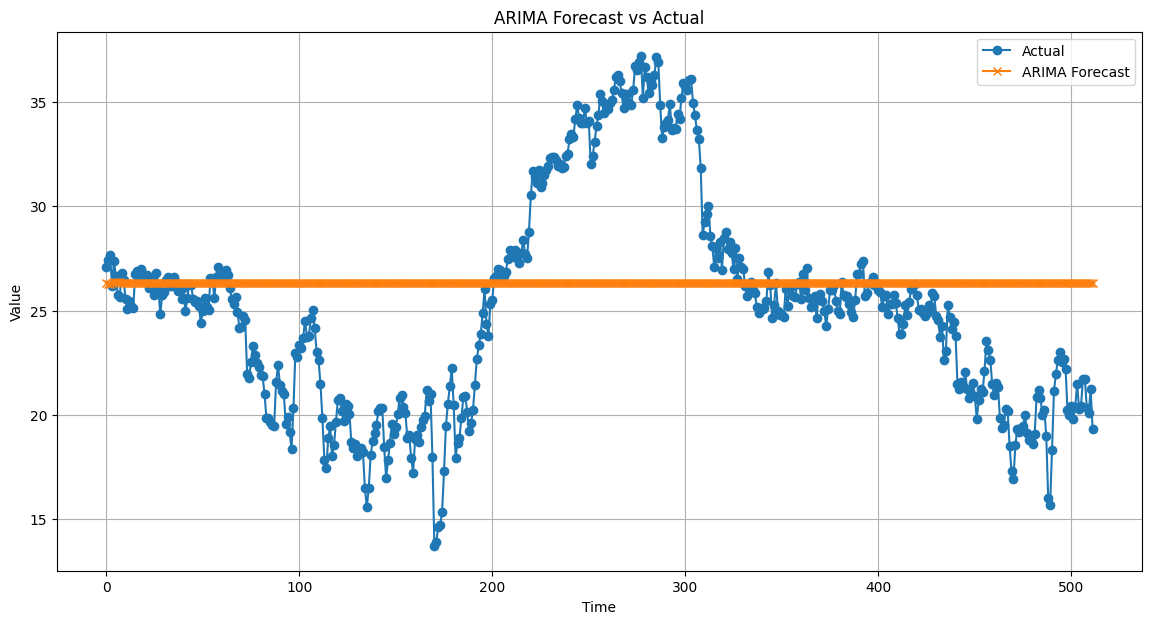

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ARIMA Forecast
arima_forecast = arima_fit.forecast(steps=len(test))

# Evaluate ARIMA Model
arima_mse = mean_squared_error(test, arima_forecast)
arima_mae = mean_absolute_error(test, arima_forecast)

print(f'ARIMA Model - Mean Squared Error (MSE): {arima_mse}')
print(f'ARIMA Model - Mean Absolute Error (MAE): {arima_mae}')

# Plot ARIMA Forecast vs Actual
plt.figure(figsize=(14, 7))
plt.plot(test, label='Actual', marker='o')
plt.plot(arima_forecast, label='ARIMA Forecast', marker='x')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
scaled_residuals

array([[0.5714336 ],
       [0.5859751 ],
       [0.59555863],
       [0.53285631],
       [0.58174941],
       [0.55052053],
       [0.51188372],
       [0.50930936],
       [0.5568815 ],
       [0.54427178],
       [0.50508701],
       [0.48497005],
       [0.50104694],
       [0.4899363 ],
       [0.48525966],
       [0.55553201],
       [0.56151981],
       [0.55216689],
       [0.56663922],
       [0.5534336 ],
       [0.55385152],
       [0.55299651],
       [0.52702848],
       [0.53767372],
       [0.5461902 ],
       [0.51170846],
       [0.55853676],
       [0.52703332],
       [0.47339284],
       [0.51298387],
       [0.51979531],
       [0.5423583 ],
       [0.54916988],
       [0.53171573],
       [0.53171572],
       [0.55044704],
       [0.53852703],
       [0.52149848],
       [0.52745847],
       [0.50446997],
       [0.52618136],
       [0.47935292],
       [0.50574713],
       [0.53469562],
       [0.53341848],
       [0.50446998],
       [0.49851   ],
       [0.499

In [9]:
time_steps

10

In [10]:
X_train[1]

array([[0.5859751 ],
       [0.59555863],
       [0.53285631],
       [0.58174941],
       [0.55052053],
       [0.51188372],
       [0.50930936],
       [0.5568815 ],
       [0.54427178],
       [0.50508701]])

In [11]:
# Build CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_steps, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mse')

# Train CNN model
cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
16/16 [==============================] - 8s 9ms/step - loss: 0.0666
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0103
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 11/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 12/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 13/100
16/16 [=================

In [12]:
# Make predictions using the CNN model
cnn_forecast = cnn_model.predict(X_test)
cnn_forecast = scaler.inverse_transform(cnn_forecast)  # Inverse scale the predictions

# Align ARIMA and CNN forecasts
arima_forecast_trimmed = arima_forecast[time_steps:]

# Combine ARIMA and CNN forecasts
combined_forecast = arima_forecast_trimmed.flatten() + cnn_forecast.flatten()

16/16 [==============================] - 0s 2ms/step


ARIMA Model - Mean Squared Error (MSE): 27.65740263204797
ARIMA Model - Mean Absolute Error (MAE): 4.123311399083795


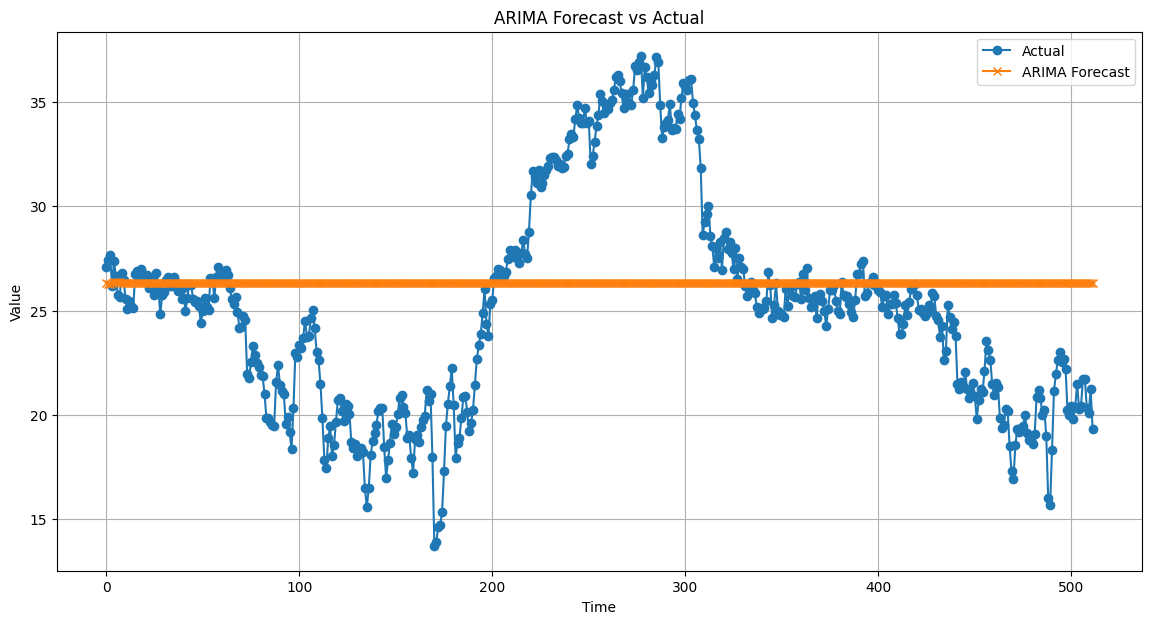

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ARIMA Forecast
arima_forecast = arima_fit.forecast(steps=len(test))

# Evaluate ARIMA Model
arima_mse = mean_squared_error(test, arima_forecast)
arima_mae = mean_absolute_error(test, arima_forecast)

print(f'ARIMA Model - Mean Squared Error (MSE): {arima_mse}')
print(f'ARIMA Model - Mean Absolute Error (MAE): {arima_mae}')

# Plot ARIMA Forecast vs Actual
plt.figure(figsize=(14, 7))
plt.plot(test, label='Actual', marker='o')
plt.plot(arima_forecast, label='ARIMA Forecast', marker='x')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0919
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0145
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0077
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0062
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 11/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 12/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 13/50
16/16 [==============================

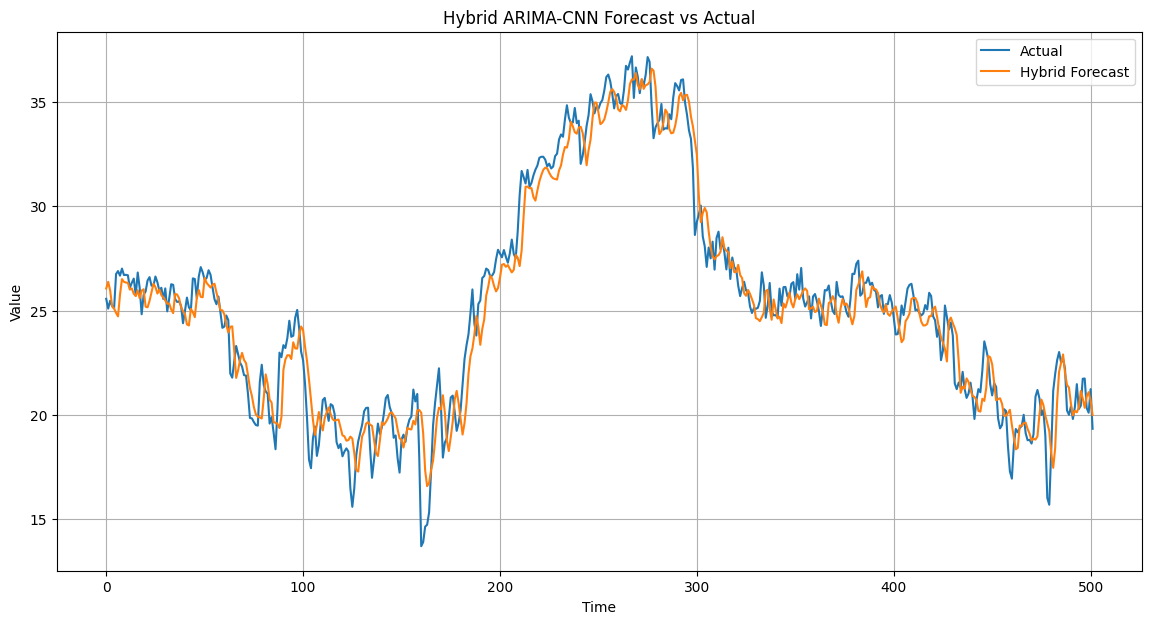


Accuracy Metrics:
              Model  Mean Squared Error (MSE)  Mean Absolute Error (MAE)
0             ARIMA                 27.657403                   4.123311
1  Hybrid ARIMA-CNN                  1.640894                   0.964841


In [17]:
# Scale the residuals from the ARIMA model
scaler = MinMaxScaler(feature_range=(0, 1))
arima_residuals = test - arima_forecast
scaled_residuals = scaler.fit_transform(arima_residuals.reshape(-1, 1))

# Prepare input for CNN
def create_cnn_input(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 10  # Example time step, tune this according to your data
X_train, y_train = create_cnn_input(scaled_residuals, time_steps)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# For testing
X_test, y_test = create_cnn_input(scaled_residuals, time_steps)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_steps, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mse')

# Train CNN model
cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Forecast with CNN
cnn_forecast = cnn_model.predict(X_test)
cnn_forecast = scaler.inverse_transform(cnn_forecast)

# Align ARIMA and CNN forecasts
arima_forecast_trimmed = arima_forecast[time_steps:]

# Combine ARIMA and CNN forecasts
combined_forecast = arima_forecast_trimmed.flatten() + cnn_forecast.flatten()

# Evaluate Hybrid Model
hybrid_mse = mean_squared_error(test[time_steps:], combined_forecast)
hybrid_mae = mean_absolute_error(test[time_steps:], combined_forecast)

print(f'Hybrid ARIMA-CNN Model - Mean Squared Error (MSE): {hybrid_mse}')
print(f'Hybrid ARIMA-CNN Model - Mean Absolute Error (MAE): {hybrid_mae}')

# Plot Hybrid Forecast vs Actual
plt.figure(figsize=(14, 7))
plt.plot(test[time_steps:], label='Actual', marker='')
plt.plot(combined_forecast, label='Hybrid Forecast', marker='')
plt.title('Hybrid ARIMA-CNN Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Create a table for accuracy metrics
accuracy_table = pd.DataFrame({
    'Model': ['ARIMA', 'Hybrid ARIMA-CNN'],
    'Mean Squared Error (MSE)': [arima_mse, hybrid_mse],
    'Mean Absolute Error (MAE)': [arima_mae, hybrid_mae]
})

print("\nAccuracy Metrics:")
print(accuracy_table)
